<div style='text-align: center;'><h1> <span style='font-family:"Times New Roman"'> <span style=''>
    <b>Restaurant Rating </b><br></h1>
</div>
<h3 style='text-align: right;'> <span style='font-family:"Times New Roman"'> <span style=''>
    Nimisha A S <br> 
    Data Science Intern <br>
    Cognifyz <br>
</h3>

## Level 1

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV 

In [4]:
data = pd.read_csv("Dataset.csv")
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1801,18312631,Raju Vaishno Amritsari Dhaba,1,Gurgaon,"17-C, Sukhrali, Sector 17, Gurgaon",Sector 17,"Sector 17, Gurgaon",77.059873,28.475269,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
5052,305181,Aakash Sweets & Caterers,1,New Delhi,"L 96, Old Rangpuri Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.124292,28.543442,"Mithai, Street Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4148,18456774,Pishori Chicken Corner,1,New Delhi,"Jail Road, New Delhi",Jail Road,"Jail Road, New Delhi",77.101803,28.623585,"Mughlai, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9382,6103902,Yauatcha,215,London,"15-17 Broadwick Street, Soho, London W1F 0DL","Broadwick Street, Soho","Broadwick Street, Soho, London",-0.135229,51.513739,"Chinese, Dim Sum",...,Pounds(��),Yes,No,No,No,4,4.7,Dark Green,Excellent,1326
2224,309134,Indian Bistro Company,1,Gurgaon,"Unit 3, Tower B, Unitech Cyber Park, Sector 39...","Unitech Cyber Park, Sector 39, Gurgaon","Unitech Cyber Park, Sector 39, Gurgaon, Gurgaon",77.055035,28.443595,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,276


In [5]:
df = data.copy()

### Task 1
### Data Exploration and Preprocessing

In [7]:
df.shape

(9551, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are some null values in cuisines. This is replaced by filling the null value with their mode

In [11]:
df.Cuisines.fillna(df.Cuisines.mode()[0], inplace = True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df["Rating text"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [13]:
df["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [14]:
df["Restaurant ID"].nunique()

9551

Shows that each restaurant has unique code also there is no duplication of restaurant name is there

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
df.duplicated().sum()

0

In [18]:
df["Rating text"].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [19]:
df["Aggregate rating"].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

This shows that 2148 restaurants are not rated. Since our target is to predict and make a machine learning model for "Aggregate rating", we may eliminate these restaurants from the data as there is no rating(It is impossible to give rating as zero). This may affect the balancing of data.

In [21]:
df_del_rating = df[df["Aggregate rating"] == 0].index
df_del_rating
df.drop(df_del_rating, inplace = True)

In [22]:
df.groupby(["Rating text", "Aggregate rating"])["Restaurant ID"].count()

Rating text  Aggregate rating
Average      2.5                 110
             2.6                 191
             2.7                 250
             2.8                 315
             2.9                 381
             3.0                 468
             3.1                 519
             3.2                 522
             3.3                 483
             3.4                 498
Excellent    4.5                  95
             4.6                  78
             4.7                  42
             4.8                  25
             4.9                  61
Good         3.5                 480
             3.6                 458
             3.7                 427
             3.8                 400
             3.9                 335
Poor         1.8                   1
             1.9                   2
             2.0                   7
             2.1                  15
             2.2                  27
             2.3                  47
        

In [23]:
df["Rating text"].value_counts()

Rating text
Average      3737
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

Here we can see that the data is not balanced. It is more important to do oversampling than undersampling as there is a high chance of losing huge data while doing undersampling.

In [25]:
ros = RandomOverSampler(random_state = 42)
df1, y = ros.fit_resample(df, df["Rating text"])
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18680,75031,Geet Indian Restaurant,189,Pretoria,"541 Fehrsen Street, Nieuw Muckleneuk, Brooklyn...",Brooklyn,"Brooklyn, Pretoria",28.235482,-25.771335,Indian,...,Rand(R),No,No,No,No,4,4.4,Green,Very Good,147
18681,3200024,Pizza Hut,1,Vadodara,"51,Akashganga Complex,Race Course Road, Vadiwa...",Vadiwadi,"Vadiwadi, Vadodara",73.165081,22.311844,"Pizza, Italian",...,Indian Rupees(Rs.),No,No,No,No,2,4.1,Green,Very Good,269
18682,305289,Kumar Samose Wala,1,New Delhi,"2/31, Near Milan Cinema, Karampura, New Delhi",Karampura,"Karampura, New Delhi",77.143839,28.664398,Street Food,...,Indian Rupees(Rs.),No,No,No,No,1,4.1,Green,Very Good,187
18683,2675,Sevilla - The Claridges,1,New Delhi,"The Claridges, 12, Dr. A.P.J. Abdul Kalam Road...","The Claridges, Aurangzeb Road","The Claridges, Aurangzeb Road, New Delhi",77.216893,28.600177,"Spanish, Italian",...,Indian Rupees(Rs.),Yes,No,No,No,4,4.3,Green,Very Good,800


In [26]:
rus = RandomUnderSampler(random_state = 42, replacement = False)
df2, y = rus.fit_resample(df, df["Rating text"])
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3468,7884,Food Land,1,New Delhi,"252-H, Kailash Plazza, Sant Nagar, East of Kai...",East of Kailash,"East of Kailash, New Delhi",77.250650,28.555613,"North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,16
1824,18423107,Ovenstory Pizza,1,Gurgaon,"Sector 23, Gurgaon",Sector 23,"Sector 23, Gurgaon",77.054064,28.504178,"Pizza, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.3,Orange,Average,15
1474,18361772,Lord of Grillz,1,Gurgaon,"Shop 2 & 3, La Mart, La Lagune, Golf Course Ro...",Golf Course Road,"Golf Course Road, Gurgaon",77.104287,28.437237,"Chinese, North Indian, Italian, Continental",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.2,Orange,Average,30
3365,18124346,Chimney,1,New Delhi,"LIG Flats, G.T.B. Enclave, Dilshad Garden, New...",Dilshad Garden,"Dilshad Garden, New Delhi",77.310639,28.687875,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
4571,9011,M J Dosa Corner,1,New Delhi,"111, Guru Nanak Market, A Block, WEA, Karol Ba...",Karol Bagh,"Karol Bagh, New Delhi",77.187023,28.645775,South Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,17621746,Diamond Thai Cuisine,216,Sioux City,"515 W 7th St, Sioux City, IA 51103",Sioux City,"Sioux City, Sioux City",-96.413600,42.501100,"Asian, Thai, Vegetarian",...,Dollar($),No,No,No,No,1,4.0,Green,Very Good,303
3641,9909,Barbeque Nation,1,New Delhi,"Ginger Hotel, DDA Community Center, Opposite E...","Ginger Hotel, Vivek Vihar","Ginger Hotel, Vivek Vihar, New Delhi",77.303949,28.665829,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,4.0,Green,Very Good,756
134,17294623,Rhinehart's Oyster Bar,216,Augusta,"3051 Washington Rd, Augusta, GA 30907",Augusta,"Augusta, Augusta",-82.050500,33.513300,"Bar Food, Sandwich, Seafood",...,Dollar($),No,No,No,No,2,4.0,Green,Very Good,456
8469,304612,RollsKing,1,Noida,"J-3, Near GIP Footover Bridge, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.324804,28.568124,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,4.0,Green,Very Good,1055


After choosing the undersampling, the data lost a lot of data while choosing the oversampling the data duplicates its own double. So it is wise to choose neither undersampling nor oversampling.

### Task 2 
### Descriptive Analysis

In [29]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,7.403000e+03,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000
mean,7.158676e+06,23.268675,63.462859,26.182970,1448.415102,1.970147,3.440024,202.185060
std,8.444634e+06,63.426253,44.696549,11.267380,18303.524265,0.930611,0.552195,479.195199
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,1.800000,4.000000
25%,1.534450e+04,1.000000,77.082416,28.475505,300.000000,1.000000,3.000000,19.000000
50%,3.120540e+05,1.000000,77.191784,28.570000,500.000000,2.000000,3.400000,60.000000
75%,1.821955e+07,1.000000,77.272293,28.645259,800.000000,3.000000,3.800000,181.000000
max,1.849606e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [30]:
df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [31]:
'''
import re
text = df["Cuisines"].unique().tolist()
Indian_pattern = "^.*Mughlai.*$"

for i in text:
    if re.search(Indian_pattern, i, re.IGNORECASE):
        print(i)
'''

'\nimport re\ntext = df["Cuisines"].unique().tolist()\nIndian_pattern = "^.*Mughlai.*$"\n\nfor i in text:\n    if re.search(Indian_pattern, i, re.IGNORECASE):\n        print(i)\n'

In [32]:
normalized_df = []

for index, row in df.iterrows():
    values = row["Cuisines"].split(", ")
    for value in values:
        new_row = row.copy()
        new_row["Cuisines"] = value
        normalized_df.append(new_row)
ndf = pd.DataFrame(normalized_df)
ndf.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4618,18322672,The Diet Kitchen,1,New Delhi,"Karol Bagh, New Delhi",Karol Bagh,"Karol Bagh, New Delhi",77.191955,28.653378,Healthy Food,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.7,Yellow,Good,39
4321,18357911,Tourist Janpath,1,New Delhi,"1, Scindia House, Janpath Road, Janpath, New D...",Janpath,"Janpath, New Delhi",77.219605,28.629143,North Indian,...,Indian Rupees(Rs.),Yes,No,No,No,4,4.1,Green,Very Good,501
8628,5681,China Hot,1,Noida,"C Block Market, Sector 41, Noida",Sector 41,"Sector 41, Noida",77.361849,28.569792,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,22


In [33]:
'''
df.Cuisines.replace({
    "North Indian, Mughlai, Chinese": "North Indian, Chinese, Mughlai", 
    "Mughlai, North Indian, Chinese": "North Indian, Chinese, Mughlai", "Lucknowi, Mughlai": "Mughlai, Lucknowi", 
    "Mughlai, Biryani": "Biryani, Mughlai", "Street Food, Mughlai": "Mughlai, Street Food", 
    "Chinese, North Indian, Mughlai": "Chinese, Mughlai, North Indian", "Chinese, Mughlai": "Mughlai, Chinese"
}, inplace = True)
'''

'\ndf.Cuisines.replace({\n    "North Indian, Mughlai, Chinese": "North Indian, Chinese, Mughlai", \n    "Mughlai, North Indian, Chinese": "North Indian, Chinese, Mughlai", "Lucknowi, Mughlai": "Mughlai, Lucknowi", \n    "Mughlai, Biryani": "Biryani, Mughlai", "Street Food, Mughlai": "Mughlai, Street Food", \n    "Chinese, North Indian, Mughlai": "Chinese, Mughlai, North Indian", "Chinese, Mughlai": "Mughlai, Chinese"\n}, inplace = True)\n'

In [34]:
ndf["Cuisines"].unique()

array(['French', 'Japanese', 'Desserts', 'Seafood', 'Asian', 'Filipino',
       'Indian', 'Sushi', 'Korean', 'Chinese', 'European', 'Mexican',
       'American', 'Ice Cream', 'Cafe', 'Italian', 'Pizza', 'Bakery',
       'Mediterranean', 'Fast Food', 'Brazilian', 'Arabian', 'Bar Food',
       'Grill', 'International', 'Peruvian', 'Latin American', 'Burger',
       'Juices', 'Healthy Food', 'Beverages', 'Lebanese', 'Sandwich',
       'Steak', 'BBQ', 'Gourmet Fast Food', 'North Eastern',
       'North Indian', 'Coffee and Tea', 'Vegetarian', 'Tapas',
       'Breakfast', 'Diner', 'Southern', 'Southwestern', 'Spanish',
       'Argentine', 'Caribbean', 'German', 'Vietnamese', 'Thai',
       'Modern Australian', 'Teriyaki', 'Cajun', 'Canadian', 'Tex-Mex',
       'Middle Eastern', 'Greek', 'Bubble Tea', 'Tea', 'Australian',
       'Fusion', 'Cuban', 'Hawaiian', 'Salad', 'Irish', 'New American',
       'Soul Food', 'Turkish', 'Pub Food', 'Continental', 'Singaporean',
       'Malay', 'Cantonese'

In [35]:
ndf["Cuisines"].nunique()

143

In [36]:
ndf["Cuisines"].str.lower().nunique()

143

In [37]:
ndf["Country Code"].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [38]:
ndf["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [39]:
ndf.City.replace({"Bras�_lia": "Brasilia", "S��o Paulo": "Sao Paulo", "��stanbul": "Istanbul"}, inplace = True)
ndf["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasilia', 'Rio de Janeiro', 'Sao Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham 

In [40]:
ndf["Cuisines"].value_counts()

Cuisines
North Indian    3026
Chinese         2184
Fast Food       1563
Mughlai          794
Italian          726
                ... 
Malwani            1
Soul Food          1
Irish              1
Drinks Only        1
B�_rek             1
Name: count, Length: 143, dtype: int64

In [41]:
Num_res = ndf.groupby(["City", "Cuisines"])["Restaurant ID"].count()
Max_res = ndf.groupby(["City", "Cuisines"])["Restaurant ID"].count().max()
Num_res[Num_res == Max_res]

City       Cuisines    
New Delhi  North Indian    1825
Name: Restaurant ID, dtype: int64

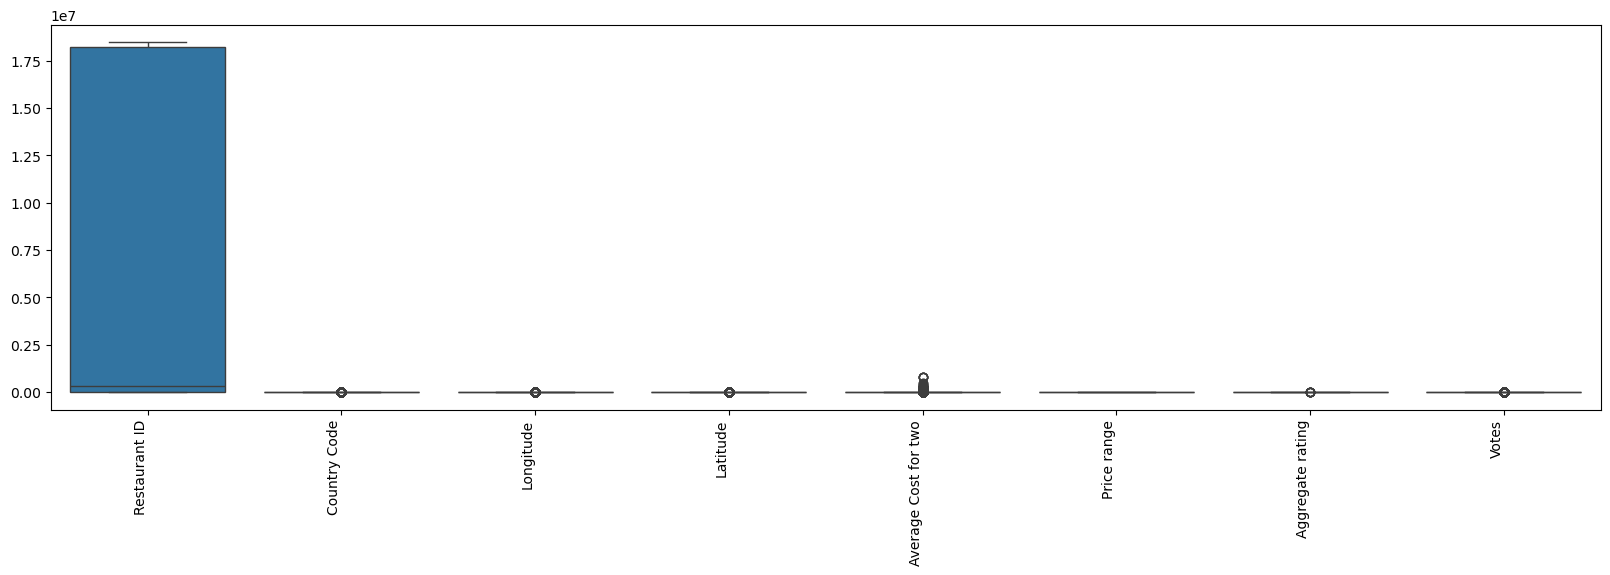

In [42]:
plt.figure(figsize = (20, 5))
sns.boxplot(ndf.select_dtypes(include = [np.number]))
plt.xticks(rotation = 90, ha = "right")
plt.show()

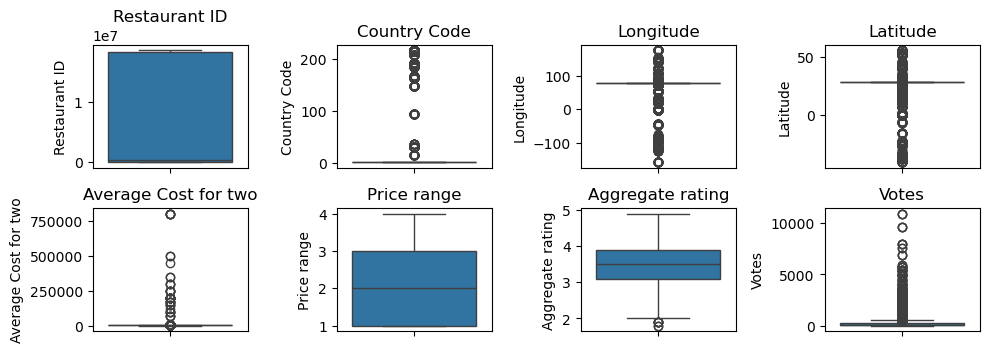

In [43]:
plt.figure(figsize=(10, 5))
num_cols = ndf.select_dtypes(include = [np.number])

for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(ndf[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

In [44]:
Correlation = pd.DataFrame(ndf.select_dtypes(include = [np.number])).corr()
Correlation

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.243760,-0.271212,-0.025813,0.008545,-0.007940,0.201105,-0.099500
Country Code,0.243760,1.000000,-0.735327,-0.035161,0.039983,0.178974,0.369109,0.090550
Longitude,-0.271212,-0.735327,1.000000,-0.075681,0.050304,-0.048039,-0.265329,-0.059757
Latitude,-0.025813,-0.035161,-0.075681,1.000000,-0.124051,-0.225608,-0.188005,-0.039117
Average Cost for two,0.008545,0.039983,0.050304,-0.124051,1.000000,0.065318,0.077385,0.058584
Price range,-0.007940,0.178974,-0.048039,-0.225608,0.065318,1.000000,0.398284,0.270922
Aggregate rating,0.201105,0.369109,-0.265329,-0.188005,0.077385,0.398284,1.000000,0.403261
Votes,-0.099500,0.090550,-0.059757,-0.039117,0.058584,0.270922,0.403261,1.000000


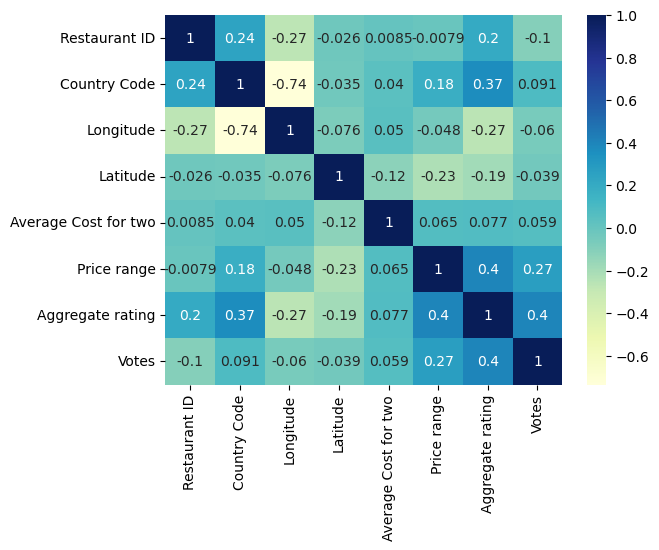

In [45]:
#plt.figure(figsize = (15, 15))
sns.heatmap(Correlation, cmap = "YlGnBu", annot = True)
plt.show()

### Task 3
### Geospatial Analysis

In [47]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [48]:
locations = dict(zip(ndf.Latitude, ndf.Longitude))
latitudes = list(ndf.Latitude)
longitudes = list(ndf.Longitude)

m = folium.Map(location = [latitudes[0], longitudes[0]], zoom_start = 2)

for lat, long in zip(latitudes, longitudes):
    folium.Marker(location = [lat, long], popup = "Restaurant").add_to(m)

m.save("restaurants.html")

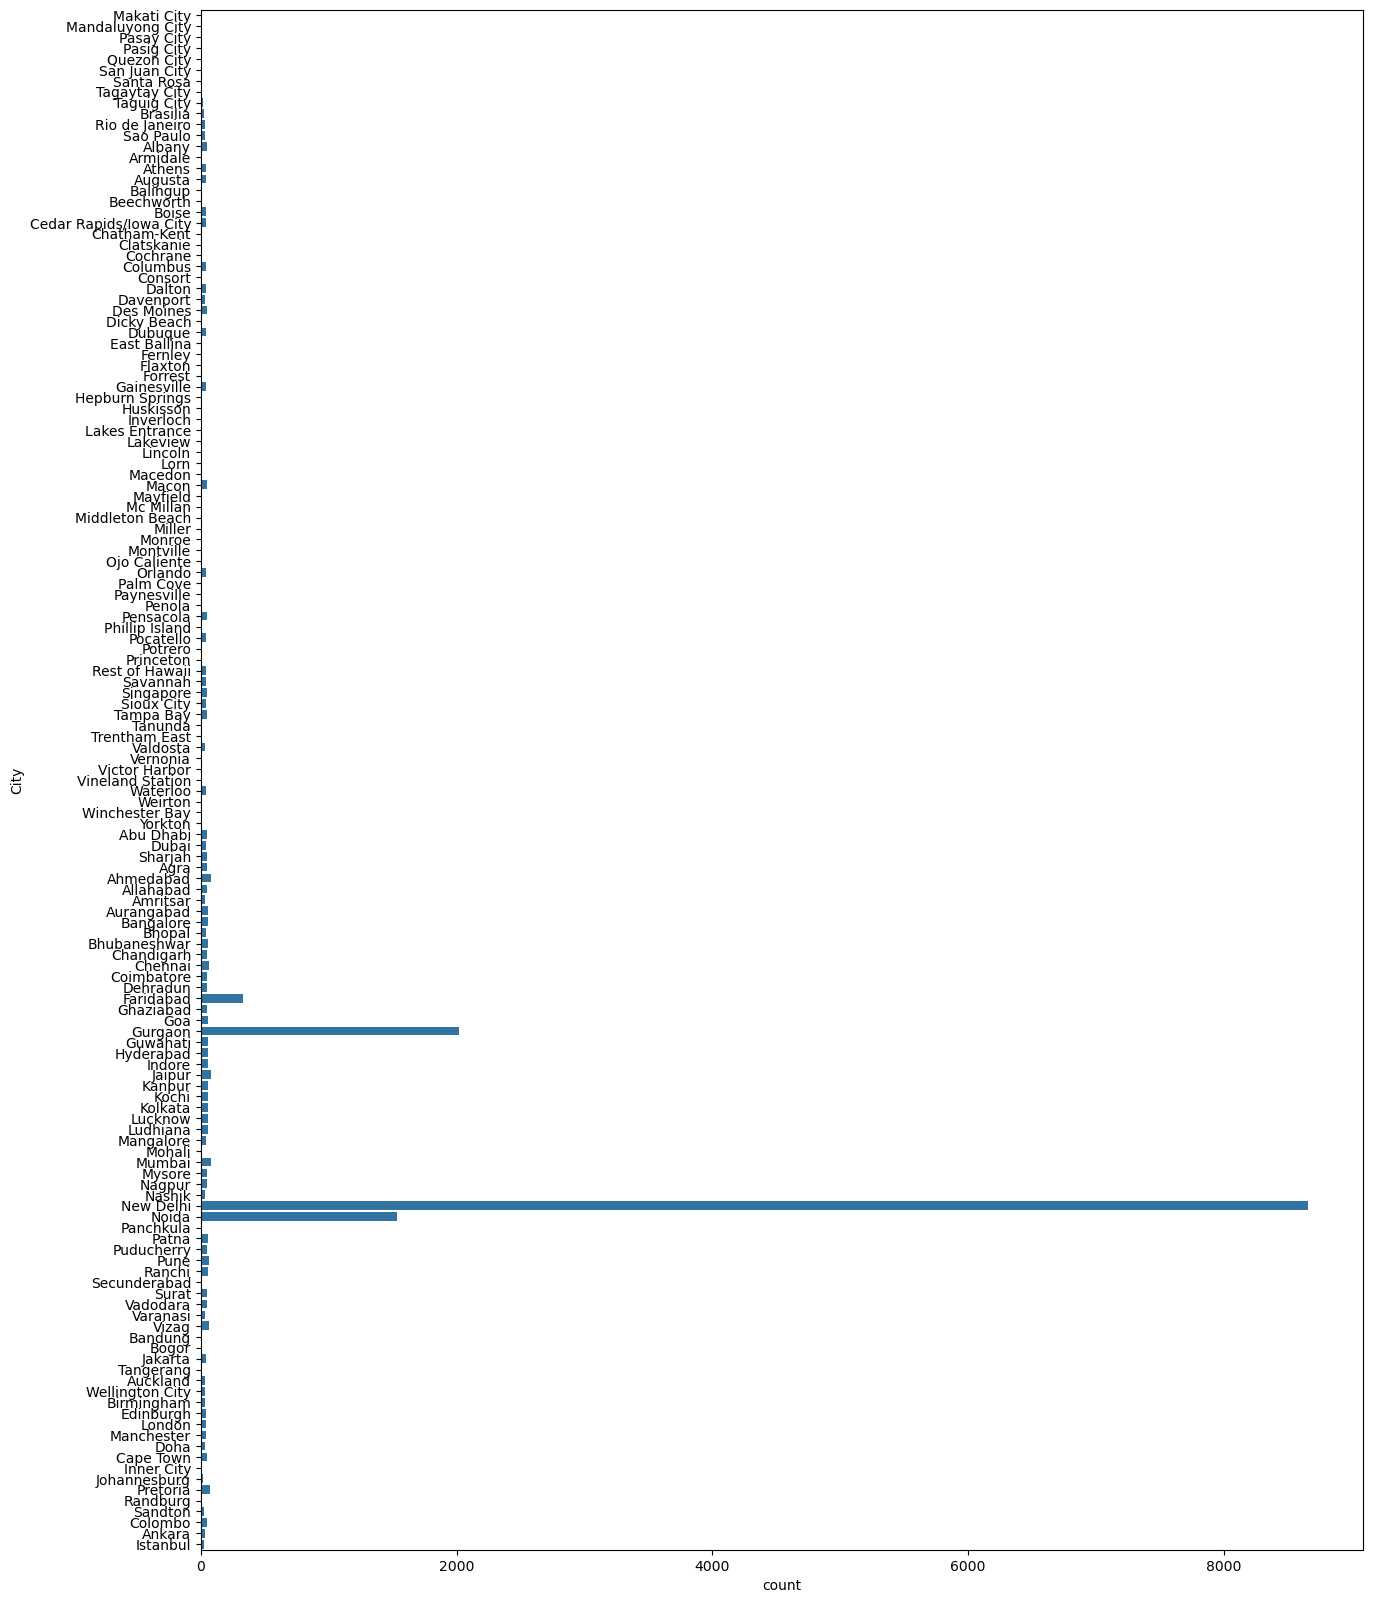

In [49]:
plt.figure(figsize=(15, 20))
sns.countplot(ndf.City)
plt.show()

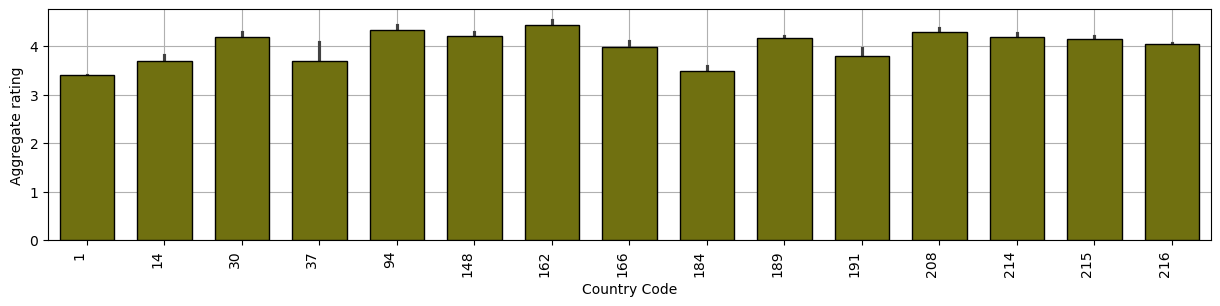

In [50]:
plt.figure(figsize=(15, 3))
sns.barplot(x = "Country Code", y = "Aggregate rating", data = ndf, color = 'olive', edgecolor = 'black', width = 0.7, zorder = 3) 
plt.xticks(rotation = 90, ha = "right")
plt.grid(zorder = 0) 
plt.show()

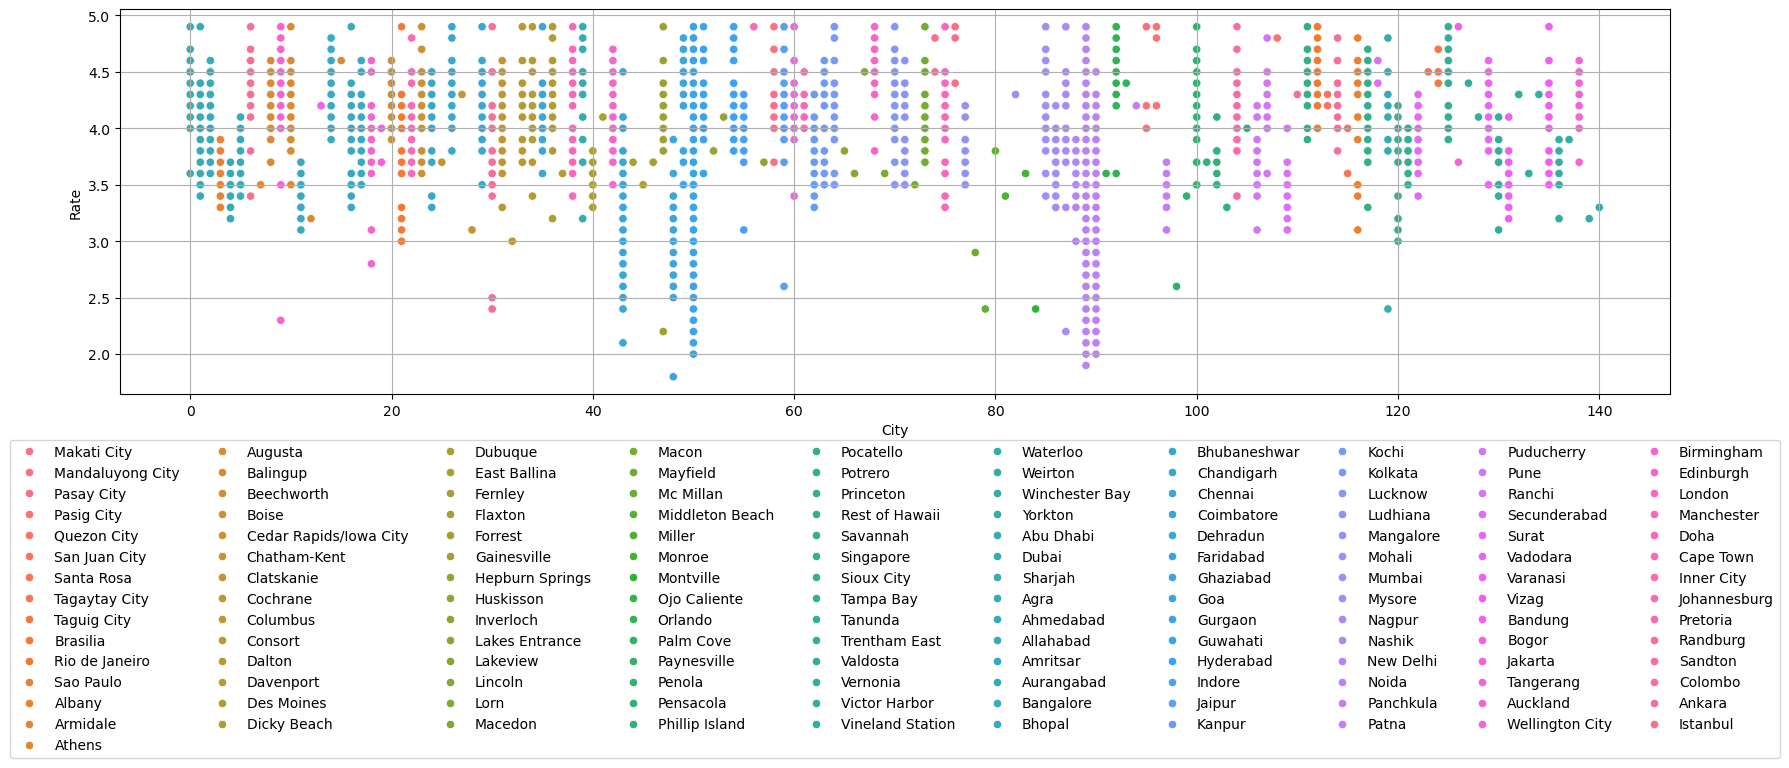

,Rate,City,City name
0,4.8,74,Makati City
0,4.8,74,Makati City
0,4.8,74,Makati City
1,4.5,74,Makati City
2,4.4,76,Mandaluyong City
...,...,...,...
9547,4.2,58,Istanbul
9548,3.7,58,Istanbul
9548,3.7,58,Istanbul
9549,4.0,58,Istanbul


In [51]:
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
Location_encode = lr.fit_transform(ndf["City"]) 
Location_encode

loc_rati = pd.DataFrame({"Rate": ndf["Aggregate rating"], "City": Location_encode, "City name": ndf["City"]})

plt.figure(figsize=(20, 5))
sns.scatterplot(x = loc_rati["City"], y = loc_rati["Rate"], hue = loc_rati["City name"])
plt.legend(loc = "upper center", bbox_to_anchor=(0.5, -0.1), ncol = 10)
plt.grid()
plt.show()

loc_rati

## Level 2

### Task 1 
### Table Booking and Online Delivery

In [54]:
ndf["Price range"].unique()

array([3, 4, 2, 1], dtype=int64)

In [55]:
Has_Table_booking = (ndf["Has Table booking"] == "Yes").sum() / len(ndf) * 100 
Has_Online_delivery = (ndf["Has Online delivery"] == "Yes").sum() / len(ndf) * 100 

print(f"Percentage of restaurants that offer table booking: {Has_Table_booking}%")
print(f"Percentage of restaurants that offer online delivery: {Has_Online_delivery}%")

Percentage of restaurants that offer table booking: 18.71467190956009%
Percentage of restaurants that offer online delivery: 34.66453674121406%


In [56]:
Avg_rating_with_table_booking = ndf[ndf["Has Table booking"] == "Yes"]["Aggregate rating"].mean()
Avg_rating_without_table_booking = ndf[ndf["Has Table booking"] == "No"]["Aggregate rating"].mean()

print(f"Average rating with table booking is {Avg_rating_with_table_booking} \nAverage rating without table booking is {Avg_rating_without_table_booking}")

Average rating with table booking is 3.6171043992120815 
Average rating without table booking is 3.4396749811035523


In [57]:
for i in ndf["Price range"].unique():
    online_delivery_availability = (ndf[ndf['Price range'] == i]['Has Online delivery'] == 'Yes').sum() / len(ndf[ndf['Price range'] == i]) * 100
    print(f"Online delivery availability for {i} as their price range for all restaurants: {online_delivery_availability:.2f}%")

Online delivery availability for 3 as their price range for all restaurants: 31.60%
Online delivery availability for 4 as their price range for all restaurants: 10.44%
Online delivery availability for 2 as their price range for all restaurants: 48.97%
Online delivery availability for 1 as their price range for all restaurants: 25.12%


### Task 2
### Price Range Analysis

In [59]:
Most_common_price_range = ndf["Price range"].mode().iloc[0]
Most_common_price_range

2

In [60]:
list1 = []
for i in ndf["Price range"].unique():
    Average_rating = ndf[ndf["Price range"] == i]["Aggregate rating"].mean()
    print(f"Average rating for price range {i} is {Average_rating:.1f}")
    list1.append(Average_rating)

Average rating for price range 3 is 3.8
Average rating for price range 4 is 3.9
Average rating for price range 2 is 3.4
Average rating for price range 1 is 3.2


In [61]:
round(max(list1), 1)

3.9

In [62]:
Average_rating_color = ndf[ndf["Aggregate rating"] == round(max(list1), 1)]["Rating color"].unique()
Average_rating_color

array(['Yellow'], dtype=object)

### Task 3
### Feature Engineering

In [64]:
y = ndf["Aggregate rating"]
X = ndf.drop("Aggregate rating", axis = 1)

In [65]:
X["Name_length"] = X["Restaurant Name"].str.len()
X["Address_length"] = X["Address"].str.len()

X["Has Table booking"] = (X["Has Table booking"] == "Yes").astype(int)
X["Has Online delivery"] = (X["Has Online delivery"] == "Yes").astype(int)
X["Is delivering now"] = (X["Is delivering now"] == "Yes").astype(int)
X["Switch to order menu"] = (X["Switch to order menu"] == "Yes").astype(int)

In [66]:
X["Country Code"].nunique()

15

In [67]:
X.Currency.nunique()

12

In [68]:
X["Locality Verbose"].nunique()

1227

In [69]:
X["Locality"].nunique()

1175

In [70]:
X.drop("Rating color", axis = 1, inplace = True)
X.drop("Rating text", axis = 1, inplace = True)
X.drop("Restaurant Name", axis = 1, inplace = True)
X.drop("Address", axis = 1, inplace = True)
X.drop("Currency", axis = 1, inplace = True)
X.drop("Locality Verbose", axis = 1, inplace = True)
X.drop("Longitude", axis = 1, inplace = True)
X.drop("Latitude", axis = 1, inplace = True)

In [71]:
Columns = X.select_dtypes(include = ["object"]).columns
One_Hot_Encode = pd.get_dummies(X, columns = Columns) 
One_Hot_Encode

,Restaurant ID,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Name_length,...,Cuisines_Teriyaki,Cuisines_Tex-Mex,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Turkish,Cuisines_Turkish Pizza,Cuisines_Vegetarian,Cuisines_Vietnamese,Cuisines_Western,Cuisines_World Cuisine
0,6317637,162,1100,1,0,0,0,3,314,16,...,False,False,False,False,False,False,False,False,False,False
0,6317637,162,1100,1,0,0,0,3,314,16,...,False,False,False,False,False,False,False,False,False,False
0,6317637,162,1100,1,0,0,0,3,314,16,...,False,False,False,False,False,False,False,False,False,False
1,6304287,162,1200,1,0,0,0,3,591,16,...,False,False,False,False,False,False,False,False,False,False
2,6300002,162,4000,1,0,0,0,4,270,22,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,208,105,0,0,0,0,3,1034,12,...,False,False,False,False,False,False,False,False,False,False
9548,5915807,208,170,0,0,0,0,4,661,5,...,False,False,False,False,False,False,False,False,False,False
9548,5915807,208,170,0,0,0,0,4,661,5,...,False,False,False,False,False,False,False,False,False,True
9549,5916112,208,120,0,0,0,0,4,901,11,...,False,False,False,False,False,False,False,False,False,False


In [72]:
from sklearn.preprocessing import StandardScaler 

standard_scaler = StandardScaler()
ScaledX = standard_scaler.fit_transform(One_Hot_Encode)
ScaledX

array([[-1.06131250e-01,  2.25102195e+00, -2.24769234e-02, ...,
        -3.59431521e-02, -2.47947433e-02, -1.56786811e-02],
       [-1.06131250e-01,  2.25102195e+00, -2.24769234e-02, ...,
        -3.59431521e-02, -2.47947433e-02, -1.56786811e-02],
       [-1.06131250e-01,  2.25102195e+00, -2.24769234e-02, ...,
        -3.59431521e-02, -2.47947433e-02, -1.56786811e-02],
       ...,
       [-1.53549950e-01,  2.99187536e+00, -7.30628841e-02, ...,
        -3.59431521e-02, -2.47947433e-02,  6.37808749e+01],
       [-1.53513958e-01,  2.99187536e+00, -7.57825594e-02, ...,
        -3.59431521e-02, -2.47947433e-02, -1.56786811e-02],
       [-1.52181661e-01,  2.99187536e+00, -7.93181373e-02, ...,
        -3.59431521e-02, -2.47947433e-02, -1.56786811e-02]])

In [73]:
Scaled_X = pd.DataFrame(ScaledX, columns = One_Hot_Encode.columns)
Scaled_X

,Restaurant ID,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Name_length,...,Cuisines_Teriyaki,Cuisines_Tex-Mex,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Turkish,Cuisines_Turkish Pizza,Cuisines_Vegetarian,Cuisines_Vietnamese,Cuisines_Western,Cuisines_World Cuisine
0,-0.106131,2.251022,-0.022477,2.084083,-0.728397,-0.076623,0.0,0.979165,0.136481,0.157914,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
1,-0.106131,2.251022,-0.022477,2.084083,-0.728397,-0.076623,0.0,0.979165,0.136481,0.157914,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
2,-0.106131,2.251022,-0.022477,2.084083,-0.728397,-0.076623,0.0,0.979165,0.136481,0.157914,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
3,-0.107707,2.251022,-0.017038,2.084083,-0.728397,-0.076623,0.0,0.979165,0.650869,0.157914,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
4,-0.108212,2.251022,0.135264,2.084083,-0.728397,-0.076623,0.0,2.062055,0.054774,1.002405,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,-0.154383,2.991875,-0.076598,-0.479827,-0.728397,-0.076623,0.0,0.979165,1.473517,-0.405080,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
16272,-0.153550,2.991875,-0.073063,-0.479827,-0.728397,-0.076623,0.0,2.062055,0.780858,-1.390320,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679
16273,-0.153550,2.991875,-0.073063,-0.479827,-0.728397,-0.076623,0.0,2.062055,0.780858,-1.390320,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,63.780875
16274,-0.153514,2.991875,-0.075783,-0.479827,-0.728397,-0.076623,0.0,2.062055,1.226537,-0.545829,...,-0.011086,-0.034187,-0.11946,-0.042972,-0.029341,-0.022176,-0.037618,-0.035943,-0.024795,-0.015679


## Level 3

### Task 1
### Predictive Model

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size = 0.2, random_state = 42)

In [77]:
# Select k best

selector_kbest = SelectKBest(f_classif, k = 33)  
X_kbest = selector_kbest.fit_transform(X_train, y_train)

select_indices_kbest = selector_kbest.get_support(indices = True)
select_features_kbest = X_train.columns[select_indices_kbest]
print(select_features_kbest)

models = [
    ("Linear Regression", LinearRegression()), 
    ("Decision Tree", DecisionTreeRegressor()), 
    ("Random Forest", RandomForestRegressor()), 
    ("Gradient Boost", GradientBoostingRegressor(n_estimators=100, random_state = 42)), 
    ("Support Vector Regressor", SVR())
]

for name, model in models:
    model.fit(X_train[select_features_kbest], y_train)
    y_pred = model.predict(X_test[select_features_kbest])
    
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    
    print(f"\n\n{name}: \nMean Square Error: {mse:.2f} \nR2 Score: {r2score:.4f}")

Index(['Restaurant ID', 'Country Code', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Votes', 'City_Bangalore',
       'City_Ghaziabad', 'City_Inner City', 'City_London', 'City_Makati City',
       'City_New Delhi', 'City_Noida', 'City_Orlando', 'City_Quezon City',
       'Locality_Borivali West',
       'Locality_Century City Mall, Poblacion, Makati City',
       'Locality_Disney: Downtown Disney',
       'Locality_Express Avenue Mall,  Royapettah', 'Locality_Federal Street',
       'Locality_Koramangala 5th Block', 'Locality_Muwailih Commercial',
       'Locality_Omaxe Celebration Mall, Sohna Road, Gurgaon',
       'Locality_Rosebank', 'Locality_Shipra Mall, Indirapuram',
       'Locality_The Atrium, Suraj Kund',
       'Locality_The Great India Place, Sector 38',
       'Locality_The India Mall, New Friends Colony',
       'Locality_UP Town Center, Diliman, Quezon City',
       'Locality_Upper St Martin's Lane, Covent Garden',
       'Locality_West End Mall, Jan

In [78]:
# Lasso (L1 Regularization)

Lasso_model = Lasso(alpha = 0.01)
selector_l1 = SelectFromModel(Lasso_model, max_features = 33)  
X_lasso = selector_l1.fit_transform(X_train, y_train)

select_indices_lasso = selector_l1.get_support(indices = True)
select_features_lasso = X_train.columns[select_indices_lasso]
print(select_features_lasso)

models = [
    ("Linear Regression", LinearRegression()), 
    ("Decision Tree", DecisionTreeRegressor()), 
    ("Random Forest", RandomForestRegressor()), 
    ("Gradient Boost", GradientBoostingRegressor(n_estimators=100, random_state = 42)), 
    ("Support Vector Regressor", SVR())
]

for name, model in models:
    model.fit(X_train[select_features_lasso], y_train)
    y_pred = model.predict(X_test[select_features_lasso])
    
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    
    print(f"\n\n{name}: \nMean Square Error: {mse:.2f} \nR2 Score: {r2score:.4f}")

Index(['Restaurant ID', 'Country Code', 'Price range', 'Votes', 'City_Chennai',
       'City_Coimbatore', 'City_Faridabad', 'City_Gurgaon', 'City_Guwahati',
       'City_Jaipur', 'City_Kochi', 'City_London', 'City_Lucknow',
       'City_Ludhiana', 'City_New Delhi', 'City_Noida', 'City_Rio de Janeiro',
       'City_Singapore', 'Locality_DLF Mall of India, Sector 18,  Noida',
       'Locality_Dubuque', 'Locality_Greater Kailash (GK) 1',
       'Locality_Paharganj', 'Locality_Rajouri Garden', 'Locality_Sector 14',
       'Locality_Sector 29', 'Locality_V3S Mall, Laxmi Nagar',
       'Locality_Vaishali Nagar', 'Cuisines_Chinese', 'Cuisines_Desserts',
       'Cuisines_Fast Food', 'Cuisines_Mughlai', 'Cuisines_North Indian',
       'Cuisines_Pizza'],
      dtype='object')


Linear Regression: 
Mean Square Error: 0.16 
R2 Score: 0.4873


Decision Tree: 
Mean Square Error: 0.07 
R2 Score: 0.7755


Random Forest: 
Mean Square Error: 0.04 
R2 Score: 0.8570


Gradient Boost: 
Mean Square Error: 0

In [79]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Define hyperparameter grids for each model
svr_param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01], 
                  'learning_rate': ['constant', 'adaptive']}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 
                 'max_features': ['auto', 'sqrt', 'log2']}

# Models
svr_model = SVR()
mlp_model = MLPRegressor()
rf_model = RandomForestRegressor()

# Hyperparameter tuning using GridSearchCV
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the models
svr_grid_search.fit(X_train[select_features_lasso], y_train)
mlp_grid_search.fit(X_train[select_features_lasso], y_train)
rf_grid_search.fit(X_train[select_features_lasso], y_train)

# Evaluate on test set
svr_test_pred = svr_grid_search.predict(X_test[select_features_lasso])
mlp_test_pred = mlp_grid_search.predict(X_test[select_features_lasso])
rf_test_pred = rf_grid_search.predict(X_test[select_features_lasso])

# Calculate test MSE
svr_test_mse = mean_squared_error(y_test, svr_test_pred)
mlp_test_mse = mean_squared_error(y_test, mlp_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# Print test MSE
print("SVR Test MSE:", svr_test_mse)
print("MLPRegressor Test MSE:", mlp_test_mse)
print("Random Forest Test MSE:", rf_test_mse)
print(10 * "~~")

# Print best hyperparameters and best score for each model
print("SVR Best Hyperparameters:", svr_grid_search.best_params_)
print("SVR Best Score:", svr_grid_search.best_score_)
print(10 * "~~")

print("MLPRegressor Best Hyperparameters:", mlp_grid_search.best_params_)
print("MLPRegressor Best Score:", mlp_grid_search.best_score_)
print(10 * "~~")

print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)
print(10 * "~~")


SVR Test MSE: 0.122495199636123
MLPRegressor Test MSE: 0.11459652939728891
Random Forest Test MSE: 0.07624024154266013
~~~~~~~~~~~~~~~~~~~~
SVR Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVR Best Score: -0.12525847886058183
~~~~~~~~~~~~~~~~~~~~
MLPRegressor Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive'}
MLPRegressor Best Score: -0.11380591132141209
~~~~~~~~~~~~~~~~~~~~
Random Forest Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Score: -0.08070595969411817
~~~~~~~~~~~~~~~~~~~~


Here the best model is Random Forest Regressor

In [170]:
Best_model = RandomForestRegressor(max_depth = None, max_features = "log2", min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
Best_model

RandomForestRegressor(max_features='log2', n_estimators=300)

### Level 2
### Preference Analysis

In [81]:
X_test[select_features_kbest].isnull().sum()

Restaurant ID                                           0
Country Code                                            0
Has Table booking                                       0
Has Online delivery                                     0
Price range                                             0
Votes                                                   0
City_Bangalore                                          0
City_Ghaziabad                                          0
City_Inner City                                         0
City_London                                             0
City_Makati City                                        0
City_New Delhi                                          0
City_Noida                                              0
City_Orlando                                            0
City_Quezon City                                        0
Locality_Borivali West                                  0
Locality_Century City Mall, Poblacion, Makati City      0
Locality_Disne

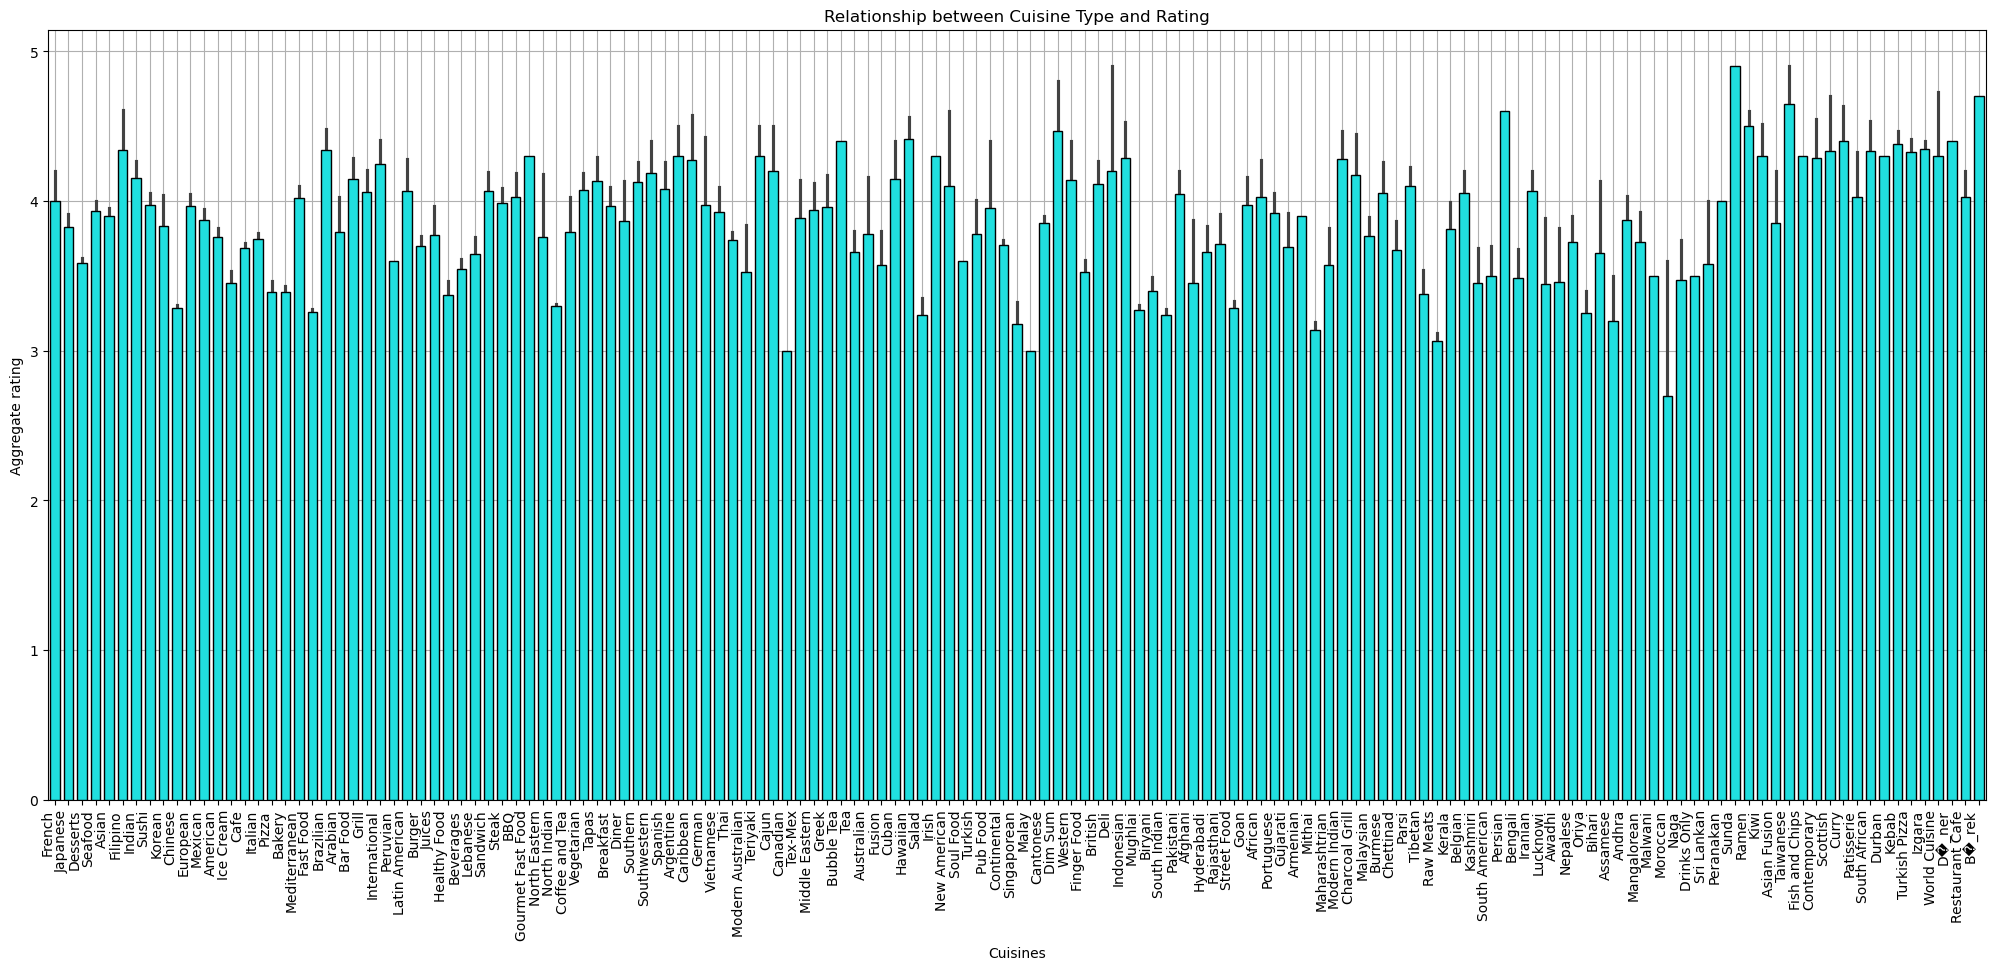

In [82]:
plt.figure(figsize=(25, 10))
sns.barplot(x = "Cuisines", y = "Aggregate rating", data = ndf, color = 'cyan', edgecolor = 'black', width = 0.7, zorder = 3) 
plt.title('Relationship between Cuisine Type and Rating')
plt.xticks(rotation = 90, ha = "right")
plt.grid(zorder = 0) 
plt.show()

In [83]:
popular_cuisines = ndf.groupby('Cuisines').size().sort_values(ascending=False)

print("Most Popular Cuisines:")
print(popular_cuisines.head(10))

Most Popular Cuisines:
Cuisines
North Indian    3026
Chinese         2184
Fast Food       1563
Mughlai          794
Italian          726
Continental      699
Cafe             634
Desserts         543
Bakery           536
South Indian     485
dtype: int64


In [84]:
'''
correlation = ndf['Cuisines'].corr(ndf['Aggregate rating'])
print("Correlation between cuisine type and rating:", correlation)
'''

'\ncorrelation = ndf[\'Cuisines\'].corr(ndf[\'Aggregate rating\'])\nprint("Correlation between cuisine type and rating:", correlation)\n'

### Level 3 
### Data Visualization

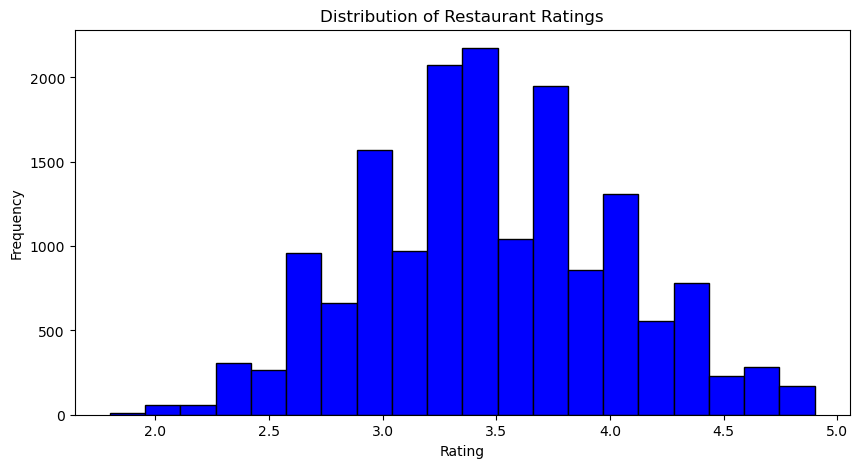

In [86]:
plt.figure(figsize=(10, 5))
plt.hist(ndf['Aggregate rating'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

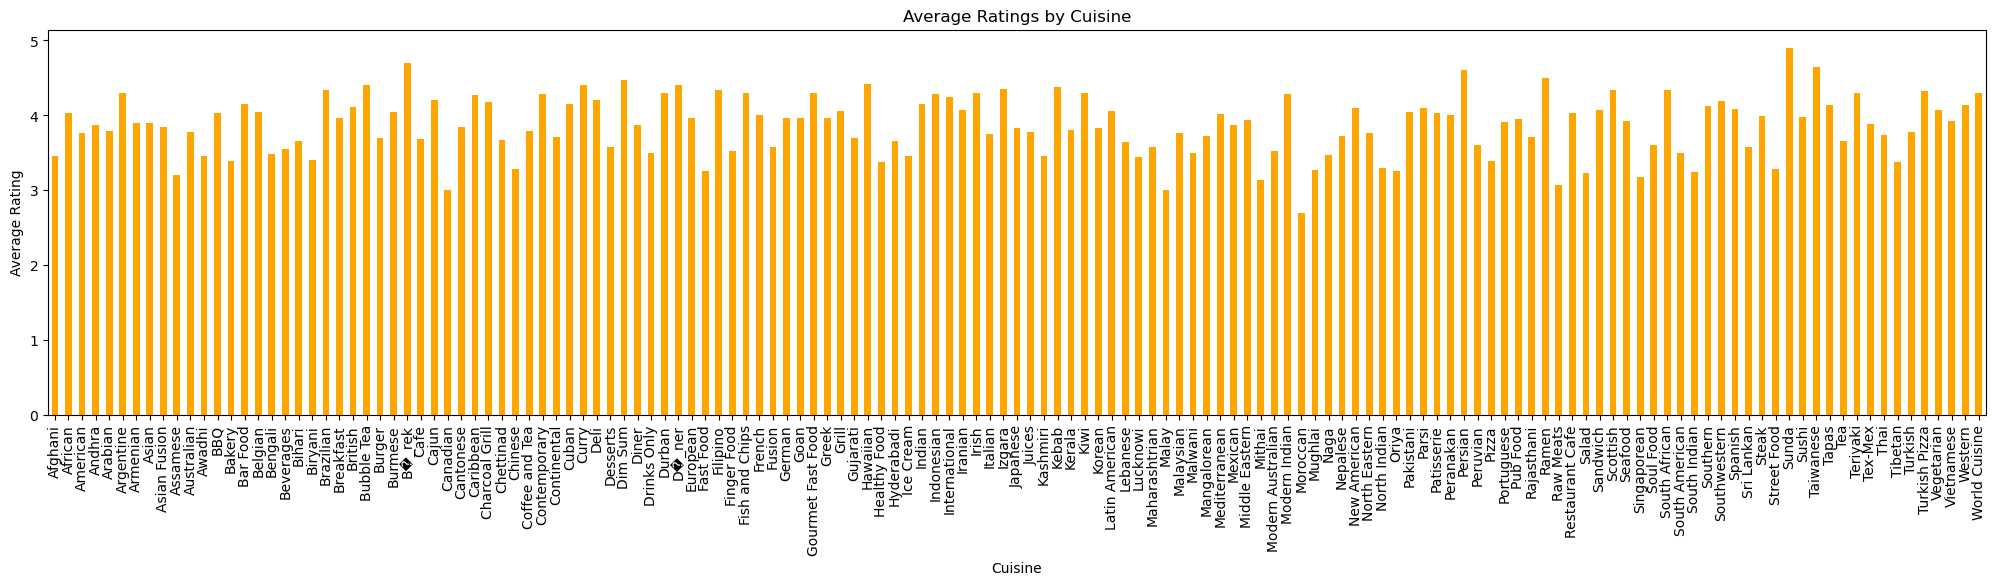

In [87]:
average_ratings_by_cuisine = ndf.groupby('Cuisines')['Aggregate rating'].mean()
plt.figure(figsize=(25, 5))
average_ratings_by_cuisine.plot(kind='bar', color='orange')
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.show()

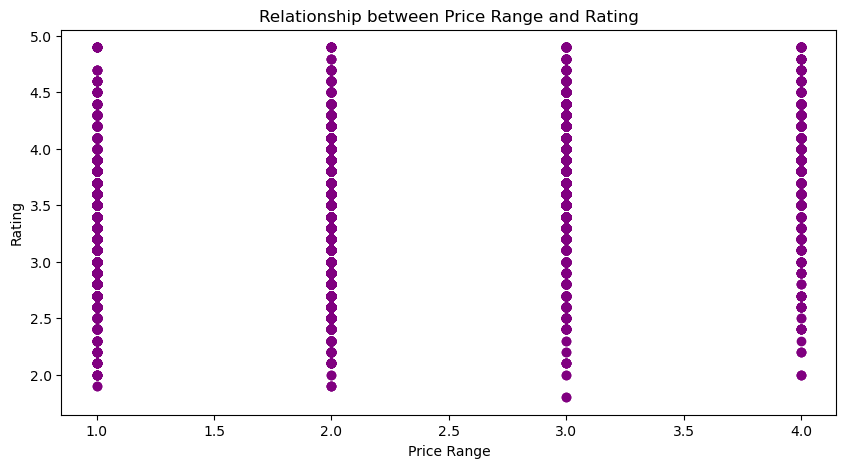

In [88]:
plt.figure(figsize=(10, 5))
plt.scatter(ndf['Price range'], ndf['Aggregate rating'], color='purple')
plt.title('Relationship between Price Range and Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

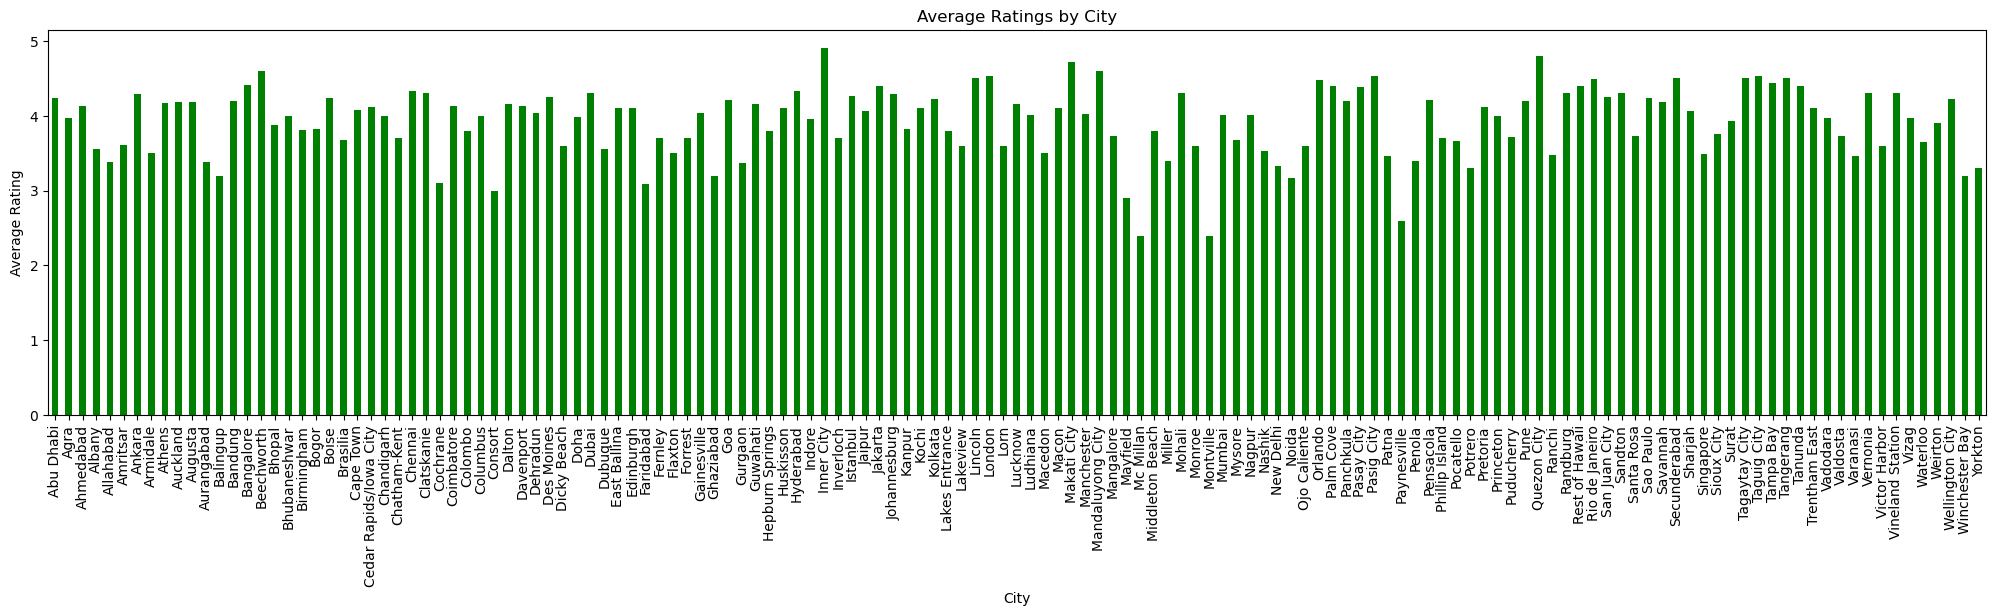

In [89]:
average_ratings_by_city = ndf.groupby('City')['Aggregate rating'].mean()
plt.figure(figsize=(25, 5))
average_ratings_by_city.plot(kind='bar', color='green')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.show()

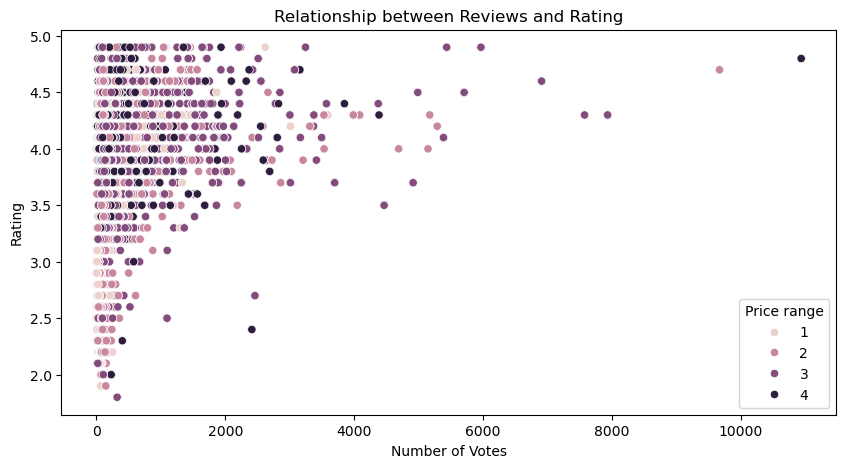

In [90]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = ndf, x = 'Votes', y = 'Aggregate rating', hue = "Price range")
plt.title('Relationship between Reviews and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()